<a href="https://colab.research.google.com/github/pwl1ft/ml_ai_scripts_notes/blob/main/notebooks/data_cleaning_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [5]:
df_benign = pd.read_csv('real_legitimate_v1.csv')
df_malware = pd.read_csv('real_malware_v1.csv')

df = pd.concat([df_benign, df_malware], ignore_index=True)

In [6]:
print('Dataset overview:')
df.info()
print('First 5 rows:')
df.head()

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78137 entries, 0 to 78136
Columns: 484 entries, Package to MalFamily
dtypes: float64(10), int64(469), object(5)
memory usage: 288.5+ MB
First 5 rows:


,Package,Malware,execve,getuid32,getgid32,geteuid32,getegid32,getresuid32,getresgid32,readahead,...,NrIntServicesActions,NrIntActivities,NrIntActivitiesActions,NrIntReceivers,NrIntReceiversActions,TotalIntentFilters,NrServices,Scanners,Detection_Ratio,MalFamily
0,outside.walljul01e\n,0,0,35,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,66,0.0,NaN
1,org.developerworks.ifp\n,0,0,22,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,0.0,2.0,1.0,66,0.0,NaN
2,zen.meditation.android\n,0,0,59,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,66,0.0,NaN
3,com.kauf.jokes.account1.FunnyAnimalJokes\n,0,0,9,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,66,0.0,NaN
4,com.genwi.myalias\n,0,0,24,0,0,0,0,0,0,...,0.0,2.0,2.0,0.0,0.0,2.0,0.0,64,0.0,NaN


In [7]:
print('Missing values:')
print(df.isnull().sum())

Missing values:
Package                   0
Malware                   0
execve                    0
getuid32                  0
getgid32                  0
                      ...  
TotalIntentFilters      643
NrServices              642
Scanners                  0
Detection_Ratio           0
MalFamily             33961
Length: 484, dtype: int64


In [8]:
print('Summary statistics:')
df.describe()

Summary statistics:


,Malware,execve,getuid32,getgid32,geteuid32,getegid32,getresuid32,getresgid32,readahead,getgroups32,...,NrIntServices,NrIntServicesActions,NrIntActivities,NrIntActivitiesActions,NrIntReceivers,NrIntReceiversActions,TotalIntentFilters,NrServices,Scanners,Detection_Ratio
count,78137.000000,78137.0,78137.000000,78137.000000,78137.000000,78137.000000,78137.0,78137.0,78137.0,78137.000000,...,77495.000000,77495.000000,77495.000000,77495.000000,77495.000000,77495.000000,77494.000000,77495.000000,78137.000000,78137.000000
mean,0.529608,0.0,413.515966,0.008178,11.282619,0.010379,0.0,0.0,0.0,0.000077,...,0.514407,0.577534,2.676289,2.870779,0.514407,4.611304,5.165884,2.453900,64.797266,0.253738
std,0.499126,0.0,3262.916606,0.134798,135.341399,0.273215,0.0,0.0,0.0,0.015178,...,2.213475,2.592775,14.048998,14.243615,2.213475,10.665395,18.629562,5.251257,1.732544,0.244649
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,34.000000,0.000000
25%,0.000000,0.0,26.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,64.000000,0.000000
50%,1.000000,0.0,86.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,65.000000,0.323077
75%,1.000000,0.0,251.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,2.000000,2.000000,0.000000,5.000000,5.000000,2.000000,66.000000,0.484375
max,1.000000,0.0,224928.000000,18.000000,9108.000000,29.000000,0.0,0.0,0.0,3.000000,...,414.000000,414.000000,548.000000,548.000000,414.000000,1216.000000,569.000000,414.000000,68.000000,0.910448


In [9]:
# Add column for 'MalFamilyEncoded' to encode the labels for malware family data
# Next line logic may need changing so it's None for benign, and Unknown for malware
df['MalFamily'] = df.apply(lambda row: 'None' if row['Malware'] == 0 else (row['MalFamily'] if pd.notna(row['MalFamily']) else 'Unknown'), axis=1)
label_encoder = LabelEncoder()
df['MalFamilyEncoded'] = label_encoder.fit_transform(df['MalFamily'])
print('Malware Family Encoding Mapping:')
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

Malware Family Encoding Mapping:
{'AVPass': 0, 'AccuTrack': 1, 'Ackposts': 2, 'Acnetdoor': 3, 'AdFlex': 4, 'AdLoad': 5, 'Adsms': 6, 'Adwo': 7, 'Agent': 8, 'Airpush/StopSMS': 9, 'Aks': 10, 'AnServer/Answerbot': 11, 'Android MarsDaemon': 12, 'Antares/Antammi': 13, 'Anti': 14, 'Anydown': 15, 'AppAd': 16, 'AppTrack': 17, 'Apperhand': 18, 'Arspam': 19, 'Asacub': 20, 'Autoins': 21, 'BackFlash/Crosate': 22, 'BaiduProtect': 23, 'BankBot': 24, 'Basebridge': 25, 'Batmobi': 26, 'BeanBot': 27, 'BgServ': 28, 'Biige': 29, 'Binv': 30, 'Boogr': 31, 'Booster': 32, 'Boqx': 33, 'Boxer': 34, 'CI4': 35, 'Callflakes': 36, 'CardServ': 37, 'Cauly': 38, 'CellShark': 39, 'Cellspy': 40, 'ClickFraud': 41, 'Cnzz': 42, 'Code4hk/xRAT': 43, 'Congur': 44, 'Coogos': 45, 'Cosha': 46, 'Counterclank': 47, 'Crusewind': 48, 'DORDRAE': 49, 'Dabom': 50, 'Davitor': 51, 'Dialer': 52, 'Dirtycow': 53, 'Dnotua': 54, 'Dogowar': 55, 'Domob': 56, 'Dougalek': 57, 'Dowgin': 58, 'Downloader': 59, 'DroidCoupon': 60, 'DroidDeluxe': 61, 'D

In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Use label encoding for simple categorical variables
label_encoders = {}
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

print('Categorical columns encoded.')

# Find columns with missing values
missing_cols = df.columns[df.isnull().sum() > 0]

# Print missing values count per column
print("Columns with Missing Values:\n")
print(df[missing_cols].isnull().sum())

df.head()

Categorical columns encoded.
Columns with Missing Values:

Activities                642
NrIntServices             642
NrIntServicesActions      642
NrIntActivities           642
NrIntActivitiesActions    642
NrIntReceivers            642
NrIntReceiversActions     642
TotalIntentFilters        643
NrServices                642
dtype: int64


,Package,Malware,execve,getuid32,getgid32,geteuid32,getegid32,getresuid32,getresgid32,readahead,...,NrIntActivities,NrIntActivitiesActions,NrIntReceivers,NrIntReceiversActions,TotalIntentFilters,NrServices,Scanners,Detection_Ratio,MalFamily,MalFamilyEncoded
0,56495,0,0,35,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,66,0.0,168,168
1,55225,0,0,22,0,0,0,0,0,0,...,1.0,1.0,1.0,0.0,2.0,1.0,66,0.0,168,168
2,60010,0,0,59,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,66,0.0,168,168
3,24799,0,0,9,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,66,0.0,168,168
4,19455,0,0,24,0,0,0,0,0,0,...,2.0,2.0,0.0,0.0,2.0,0.0,64,0.0,168,168


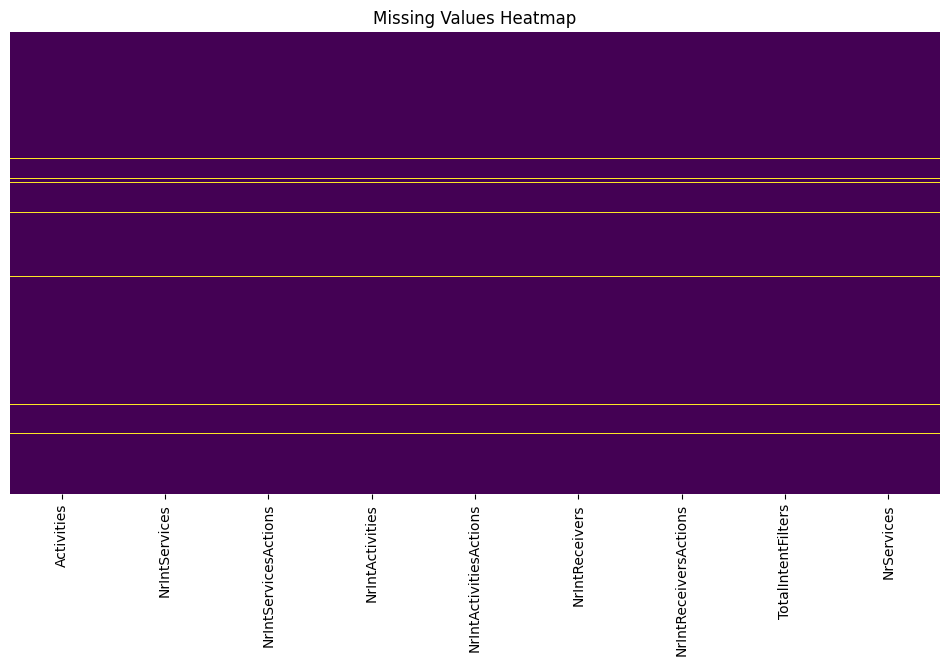

In [11]:
# Only plot columns where there are missing values in the heatmap
missing_cols = df.columns[df.isnull().sum() > 0]
df_missing = df[missing_cols]

plt.figure(figsize=(12, 6))
sns.heatmap(df_missing.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
none_cols = df.columns[(df == 'None').sum() > 0]  # Columns with 'None' as string

# Combine both sets of columns
columns_to_fix = set(missing_cols).union(set(none_cols))

print("Columns to be fixed:\n", columns_to_fix)

# Replace NaN and 'None' values with 0
df[list(columns_to_fix)] = df[list(columns_to_fix)].replace(['None', None], 0).fillna(0)

# Find columns with missing values
missing_cols = df.columns[df.isnull().sum() > 0]

# Print missing values count per column
print("Columns with Missing Values:\n")
print(df[missing_cols].isnull().sum())

Columns to be fixed:
 {'TotalIntentFilters', 'NrIntReceivers', 'NrIntActivities', 'NrIntServicesActions', 'NrIntReceiversActions', 'NrIntServices', 'NrServices', 'NrIntActivitiesActions', 'Activities'}
Columns with Missing Values:

Series([], dtype: float64)


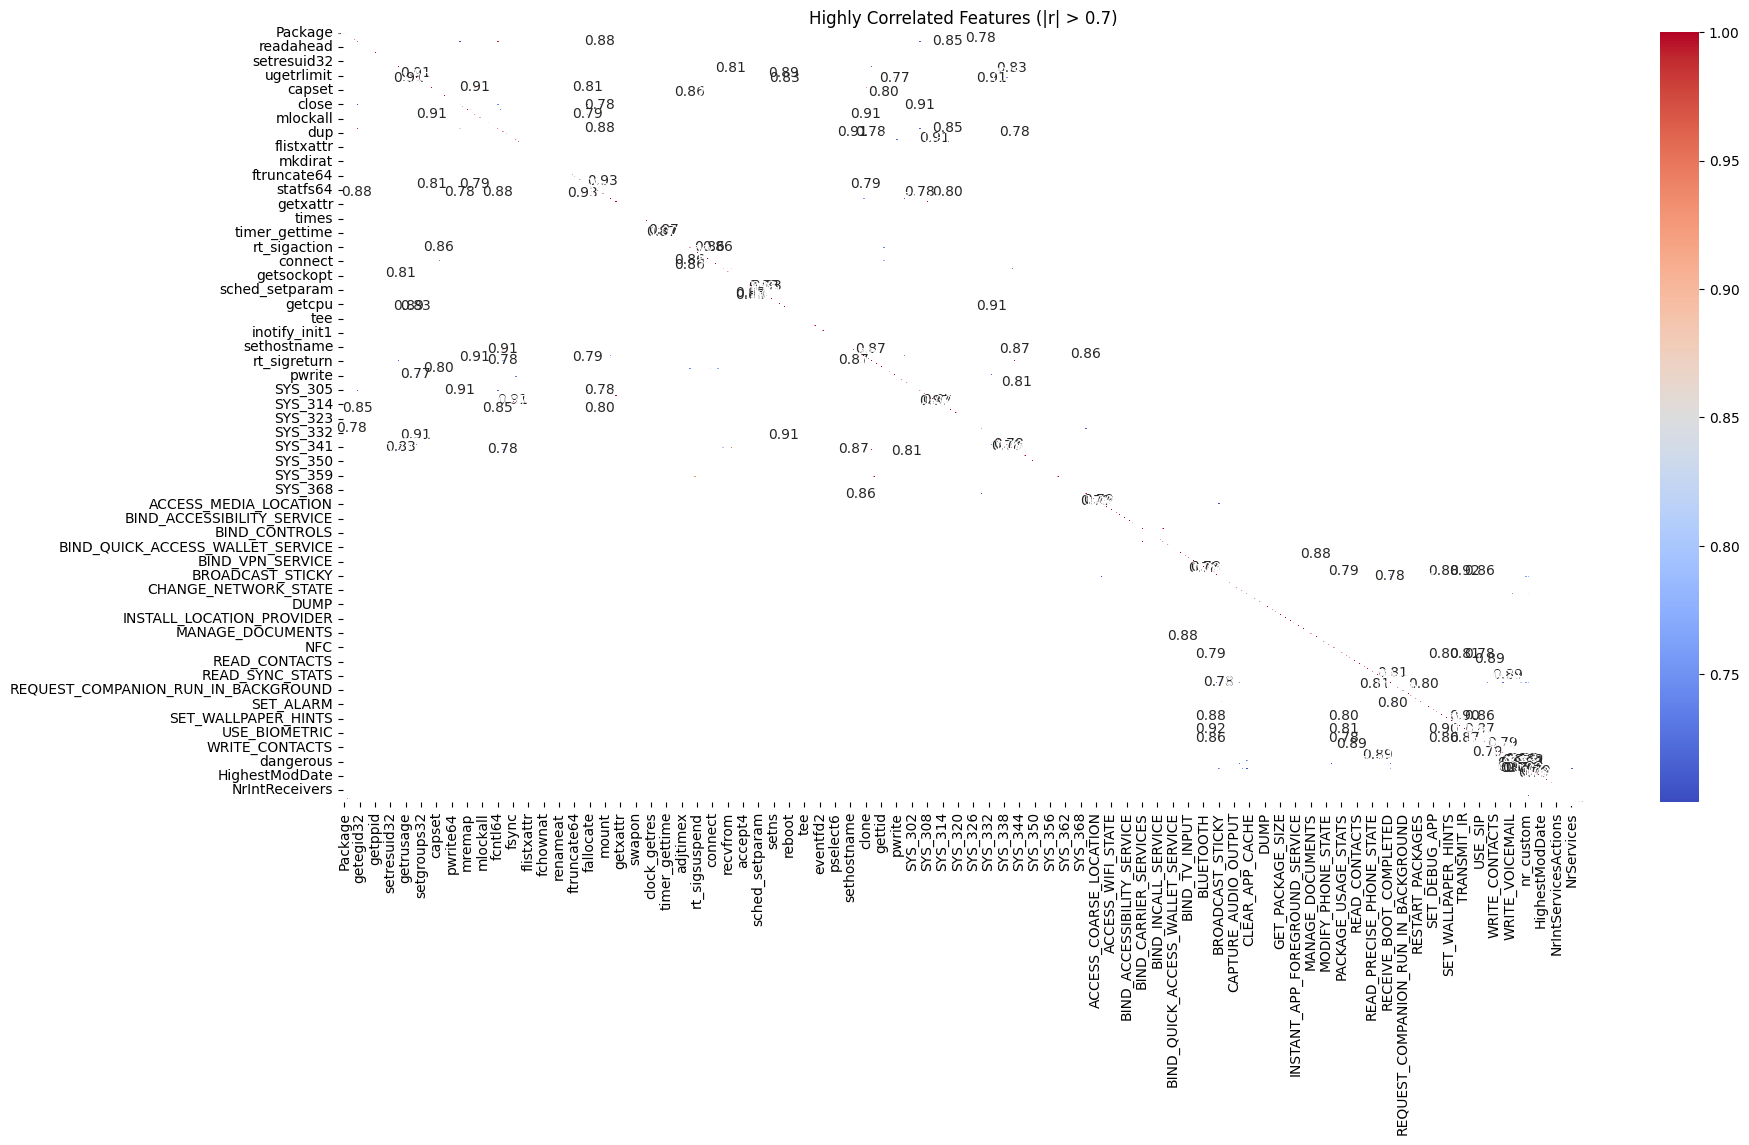

In [13]:
def plot_corr_matrix(df):
  corr_matrix = df.corr()

  threshold = 0.7
  high_corr = corr_matrix[abs(corr_matrix) > threshold]

  plt.figure(figsize=(20, 10))
  sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
  plt.title("Highly Correlated Features (|r| > 0.7)")
  plt.show()

plot_corr_matrix(df)

In [14]:
categorical_features = df.select_dtypes(include=['object']).columns
if len(categorical_features) > 0:
    for col in categorical_features:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
        plt.title(f"Distribution of {col}")
        plt.show()

In [15]:
# Use random forest to determine the top features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
X = df.drop(columns=['Malware', 'MalFamilyEncoded', 'MalFamily'])
y = df['Malware']
rf.fit(X, y)

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_100_features = feature_importance_df.head(100)
bottom_50_features = feature_importance_df.tail(50)

print("Top 100 Features:")
print(top_100_features)

# print("Bottom 50 Features:")
# print(bottom_50_features)

df_top_features = df[top_100_features['Feature']]
df_top_features.head()

Top 100 Features:
                  Feature  Importance
481       Detection_Ratio    0.190841
462            total_perm    0.050160
400      READ_PHONE_STATE    0.044989
456        nr_permissions    0.043448
457                normal    0.031650
..                    ...         ...
473  NrIntServicesActions    0.001408
259               SYS_340    0.001375
395         READ_CONTACTS    0.001274
480              Scanners    0.001242
60                  flock    0.001139

[100 rows x 2 columns]


,Detection_Ratio,total_perm,READ_PHONE_STATE,nr_permissions,normal,NrIntReceiversActions,SEND_SMS,dangerous,NrServices,WRITE_EXTERNAL_STORAGE,...,custom_yes,CHANGE_WIFI_STATE,NrIntServices,sha256,READ_EXTERNAL_STORAGE,NrIntServicesActions,SYS_340,READ_CONTACTS,Scanners,flock
0,0.0,7,1,7,4,0.0,0,2,0.0,1,...,0,0,0.0,48012,0,0.0,0,0,66,0
1,0.0,8,1,8,6,0.0,0,2,1.0,0,...,0,1,1.0,68138,0,1.0,0,0,66,0
2,0.0,3,0,3,2,0.0,0,1,0.0,1,...,0,0,0.0,53005,0,0.0,1,0,66,0
3,0.0,1,0,1,1,0.0,0,0,0.0,0,...,0,0,0.0,67814,0,0.0,0,0,66,0
4,0.0,9,1,7,3,0.0,0,4,0.0,0,...,1,0,0.0,71011,0,0.0,0,0,64,0


In [16]:
# Identify highly correlated features
def calculate_vif(df):
  vif_data = pd.DataFrame()
  vif_data['feature'] = df.columns
  vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
  return vif_data

# Calculate VIF for all features
vif_df = calculate_vif(df_top_features)
high_vif_features = vif_df[vif_df['VIF'] > 5]['feature']
print(f'Number of highly correlated features: {len(high_vif_features)}')
print("Highly Correlated Features (VIF > 5):")
print(high_vif_features)

df_top_features.drop(columns=high_vif_features, inplace=True)
df_top_features.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Number of highly correlated features: 58
Highly Correlated Features (VIF > 5):
0            Detection_Ratio
1                 total_perm
2           READ_PHONE_STATE
3             nr_permissions
4                     normal
6                   SEND_SMS
7                  dangerous
8                 NrServices
9     WRITE_EXTERNAL_STORAGE
10                 getrlimit
11               RECEIVE_SMS
12               getpriority
13                 signature
14         ACCESS_WIFI_STATE
15                 fstatfs64
17                     uname
20                      read
24        TotalIntentFilters
26                   SYS_333
27                   madvise
31                     ioctl
32             clock_gettime
33                   SYS_311
40                     mmap2
42           EarliestModDate
43                     prctl
44            HighestModDate
45                 CFileSize
46    NrIntActivitiesActions
49                     fsync
51           NrIntActivities
52                   S

<ipython-input-16-5b327b01ca49>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_features.drop(columns=high_vif_features, inplace=True)


,NrIntReceiversActions,TimesSubmitted,FilesInsideAPK,SYS_317,SYSTEM_ALERT_WINDOW,RECEIVE_BOOT_COMPLETED,getsockopt,GET_TASKS,writev,WAKE_LOCK,...,GET_ACCOUNTS,CALL_PHONE,FOREGROUND_SERVICE,WRITE_SETTINGS,custom_yes,CHANGE_WIFI_STATE,sha256,READ_EXTERNAL_STORAGE,READ_CONTACTS,flock
0,0.0,4,123,10,0,0,2,1,8,0,...,0,0,0,0,0,0,48012,0,0,0
1,0.0,5,171,0,0,0,0,0,3,0,...,0,0,0,0,0,1,68138,0,0,0
2,0.0,21,538,0,0,0,1,0,21,0,...,0,0,0,0,0,0,53005,0,0,0
3,0.0,7,57,4,0,0,1,0,4,0,...,0,0,0,0,0,0,67814,0,0,0
4,0.0,3,104,0,0,0,0,0,8,0,...,0,1,0,0,1,0,71011,0,0,0


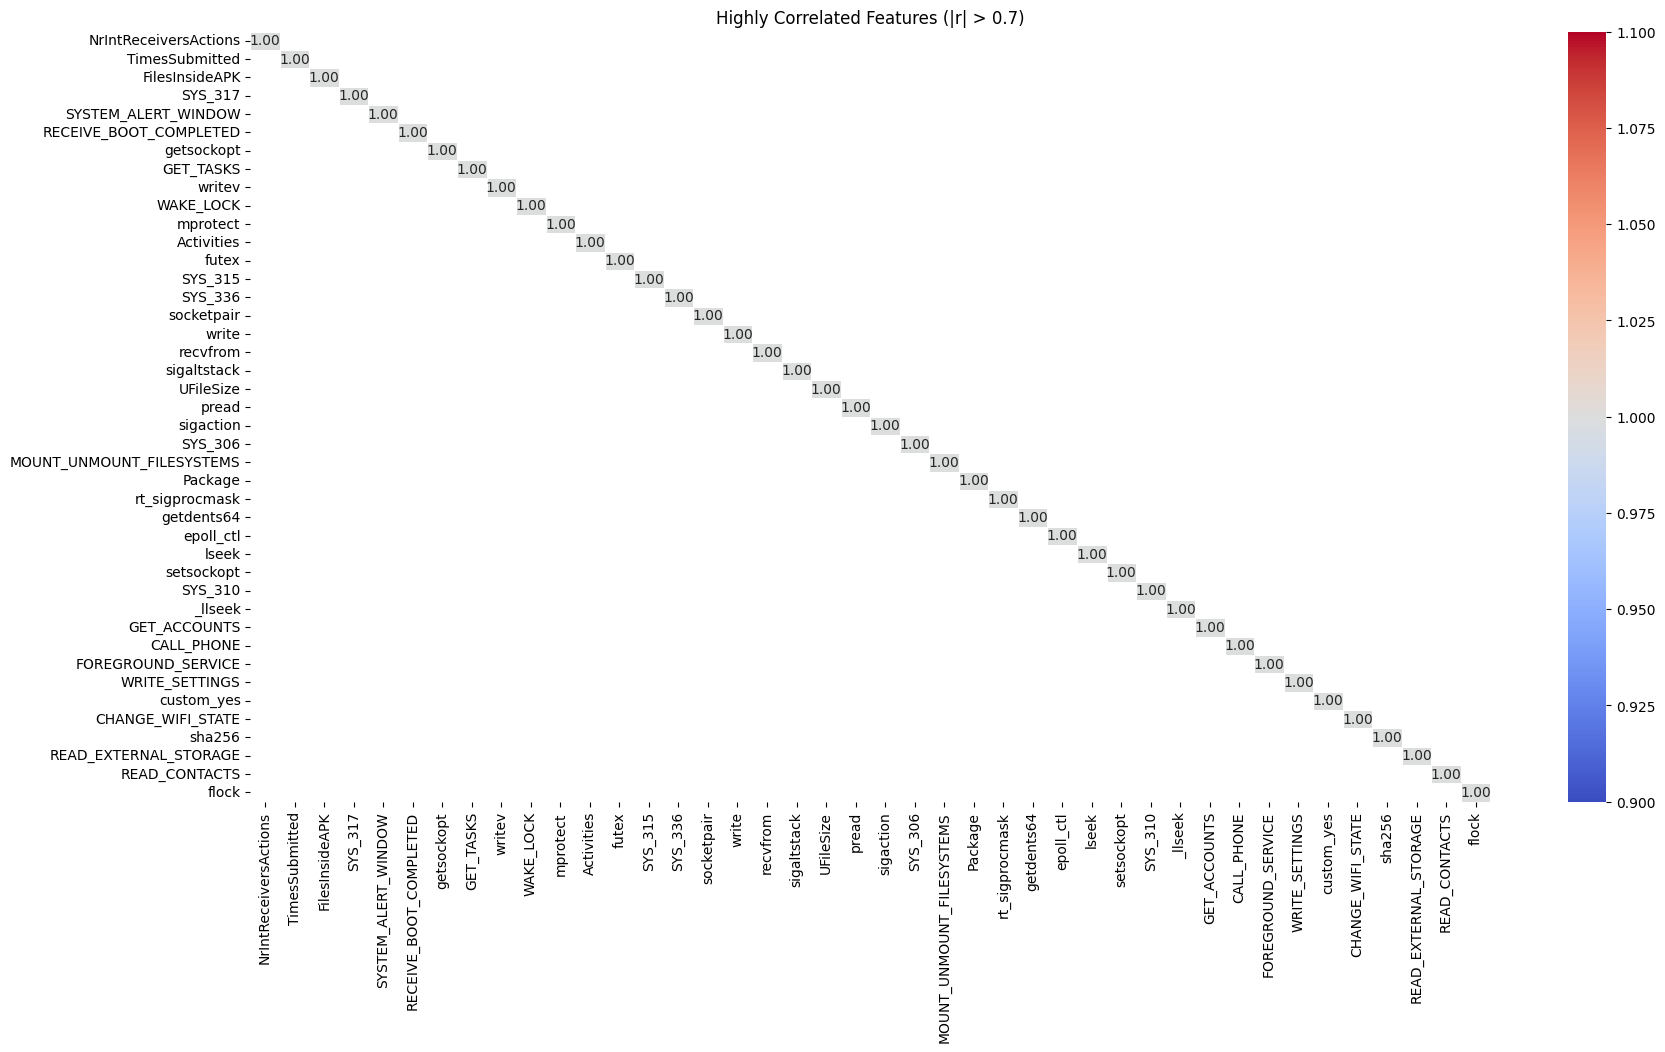

In [17]:
plot_corr_matrix(df_top_features)

In [18]:
# Make sure the labels still exist before saving the data
df_top_features['Malware'] = df['Malware']
df_top_features['MalFamilyEncoded'] = df['MalFamilyEncoded']
df_top_features.head()

<ipython-input-18-9b7fb4c30b53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_features['Malware'] = df['Malware']
<ipython-input-18-9b7fb4c30b53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_features['MalFamilyEncoded'] = df['MalFamilyEncoded']


,NrIntReceiversActions,TimesSubmitted,FilesInsideAPK,SYS_317,SYSTEM_ALERT_WINDOW,RECEIVE_BOOT_COMPLETED,getsockopt,GET_TASKS,writev,WAKE_LOCK,...,FOREGROUND_SERVICE,WRITE_SETTINGS,custom_yes,CHANGE_WIFI_STATE,sha256,READ_EXTERNAL_STORAGE,READ_CONTACTS,flock,Malware,MalFamilyEncoded
0,0.0,4,123,10,0,0,2,1,8,0,...,0,0,0,0,48012,0,0,0,0,168
1,0.0,5,171,0,0,0,0,0,3,0,...,0,0,0,1,68138,0,0,0,0,168
2,0.0,21,538,0,0,0,1,0,21,0,...,0,0,0,0,53005,0,0,0,0,168
3,0.0,7,57,4,0,0,1,0,4,0,...,0,0,0,0,67814,0,0,0,0,168
4,0.0,3,104,0,0,0,0,0,8,0,...,0,0,1,0,71011,0,0,0,0,168


In [19]:
df_top_features.to_csv("cleaned_data_top_features.csv", index=False)

In [25]:
# Split the features out into categorical, binary, and numerical, so they can be pre-processed properly.
print(df_top_features.columns)

# These features can be scaled
numerical_features = [
    'Detection_Ratio', 'UFileSize', 'FilesInsideAPK', 'Activities',
    'ioctl', 'TimesSubmitted', 'futex', 'rt_sigprocmask', 'munmap',
    'mprotect', 'write', 'pread', 'recvfrom', 'SYS_310', 'SYS_317',
    'NrIntReceiversActions', 'getsockopt', 'SYS_306', 'sched_yield',
    'kill', 'SYS_311', 'SYS_315', 'lseek', 'pwrite', 'getdents64',
    'fstatfs64', 'fsync', 'fdatasync', '_llseek', 'sigaction',
    'getrlimit', 'sigaltstack', 'SYS_312', 'socket', 'recv'
]

df_top_features.head()

Index(['NrIntReceiversActions', 'TimesSubmitted', 'FilesInsideAPK', 'SYS_317',
       'SYSTEM_ALERT_WINDOW', 'RECEIVE_BOOT_COMPLETED', 'getsockopt',
       'GET_TASKS', 'writev', 'WAKE_LOCK', 'mprotect', 'Activities', 'futex',
       'SYS_315', 'SYS_336', 'socketpair', 'write', 'recvfrom', 'sigaltstack',
       'UFileSize', 'pread', 'sigaction', 'SYS_306',
       'MOUNT_UNMOUNT_FILESYSTEMS', 'Package', 'rt_sigprocmask', 'getdents64',
       'epoll_ctl', 'lseek', 'setsockopt', 'SYS_310', '_llseek',
       'GET_ACCOUNTS', 'CALL_PHONE', 'FOREGROUND_SERVICE', 'WRITE_SETTINGS',
       'custom_yes', 'CHANGE_WIFI_STATE', 'sha256', 'READ_EXTERNAL_STORAGE',
       'READ_CONTACTS', 'flock', 'Malware', 'MalFamilyEncoded',
       'Detection_Ratio', 'ioctl', 'munmap', 'sched_yield', 'kill', 'SYS_311',
       'pwrite', 'fstatfs64', 'fsync', 'fdatasync', 'getrlimit', 'SYS_312',
       'socket', 'recv'],
      dtype='object')


,NrIntReceiversActions,TimesSubmitted,FilesInsideAPK,SYS_317,SYSTEM_ALERT_WINDOW,RECEIVE_BOOT_COMPLETED,getsockopt,GET_TASKS,writev,WAKE_LOCK,...,kill,SYS_311,pwrite,fstatfs64,fsync,fdatasync,getrlimit,SYS_312,socket,recv
0,-0.430254,-0.080259,-0.180425,-0.132442,0,0,-0.177135,1,8,0,...,-0.195304,-0.224503,-0.060964,-0.155868,-0.183608,-0.106117,-0.713576,-0.124157,-0.160941,-0.107947
1,-0.430254,-0.071274,-0.106009,-0.197704,0,0,-0.246561,0,3,0,...,-0.195304,-0.280585,-0.060964,-0.639433,-0.183608,-0.106117,-0.713576,-0.124157,-0.160941,-0.107947
2,-0.430254,0.072490,0.462959,-0.197704,0,0,-0.211848,0,21,0,...,-0.195304,-0.280585,-0.060964,-0.639433,-0.183608,-0.106117,-0.713576,-0.124157,-0.160941,-0.107947
3,-0.430254,-0.053303,-0.282746,-0.171599,0,0,-0.211848,0,4,0,...,-0.195304,-0.280585,-0.060964,-0.639433,-0.183608,-0.106117,-0.713576,-0.124157,-0.160941,-0.107947
4,-0.430254,-0.089245,-0.209881,-0.197704,0,0,-0.246561,0,8,0,...,-0.195304,-0.280585,-0.060964,-0.639433,-0.183608,-0.106117,-0.713576,-0.124157,-0.160941,-0.107947


In [26]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
df_top_features.head()

scaler = StandardScaler()
df_top_features[numerical_features] = scaler.fit_transform(df_top_features[numerical_features])

df_top_features.head()

<ipython-input-26-16b0b7c66adb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_features[numerical_features] = scaler.fit_transform(df_top_features[numerical_features])


,NrIntReceiversActions,TimesSubmitted,FilesInsideAPK,SYS_317,SYSTEM_ALERT_WINDOW,RECEIVE_BOOT_COMPLETED,getsockopt,GET_TASKS,writev,WAKE_LOCK,...,kill,SYS_311,pwrite,fstatfs64,fsync,fdatasync,getrlimit,SYS_312,socket,recv
0,-0.430254,-0.080259,-0.180425,-0.132442,0,0,-0.177135,1,8,0,...,-0.195304,-0.224503,-0.060964,-0.155868,-0.183608,-0.106117,-0.713576,-0.124157,-0.160941,-0.107947
1,-0.430254,-0.071274,-0.106009,-0.197704,0,0,-0.246561,0,3,0,...,-0.195304,-0.280585,-0.060964,-0.639433,-0.183608,-0.106117,-0.713576,-0.124157,-0.160941,-0.107947
2,-0.430254,0.072490,0.462959,-0.197704,0,0,-0.211848,0,21,0,...,-0.195304,-0.280585,-0.060964,-0.639433,-0.183608,-0.106117,-0.713576,-0.124157,-0.160941,-0.107947
3,-0.430254,-0.053303,-0.282746,-0.171599,0,0,-0.211848,0,4,0,...,-0.195304,-0.280585,-0.060964,-0.639433,-0.183608,-0.106117,-0.713576,-0.124157,-0.160941,-0.107947
4,-0.430254,-0.089245,-0.209881,-0.197704,0,0,-0.246561,0,8,0,...,-0.195304,-0.280585,-0.060964,-0.639433,-0.183608,-0.106117,-0.713576,-0.124157,-0.160941,-0.107947
